# Fraud Detection Model

## Overview
This notebook implements a fraud detection model using a Random Forest Classifier. The model aims to proactively identify fraudulent transactions in a financial dataset.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('/content/Fraud.csv')

In [49]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [50]:
df.shape

(42271, 11)

In [51]:
df.size

464981

In [52]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,C1231006815,170136.0000,160296.3600,M1979787155,0.0000,0.0000,0.0000,0.0000
1,1,PAYMENT,1864.2800,C1666544295,21249.0000,19384.7200,M2044282225,0.0000,0.0000,0.0000,0.0000
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1.0000,0.0000
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1.0000,0.0000
4,1,PAYMENT,11668.1400,C2048537720,41554.0000,29885.8600,M1230701703,0.0000,0.0000,0.0000,0.0000


In [53]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
42266,9,CASH_OUT,195364.0600,C1096102092,0.0000,0.0000,C2021579766,506957.5900,1343781.6700,0.0000,0.0000
42267,9,CASH_OUT,546075.6200,C1791035294,0.0000,0.0000,C1039162432,5075471.3100,5621546.9300,0.0000,0.0000
42268,9,CASH_OUT,111003.8700,C1145755913,0.0000,0.0000,C743528393,2533159.9400,2644163.8100,0.0000,0.0000
42269,9,CASH_OUT,101025.4400,C292739335,0.0000,0.0000,C299715257,156646.3200,491301.0400,0.0000,0.0000
42270,9,CASH_OUT,271441.2800,C2034845877,0.0000,0.0000,C71127,NaN,NaN,NaN,NaN


In [54]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19614,8,CASH_IN,46086.7400,C1435798016,3060548.4600,3106635.2000,C2112142735,210500.9700,39612.4600,0.0000,0.0000
11577,7,PAYMENT,1841.5600,C73524197,117674.1600,115832.6100,M1209783955,0.0000,0.0000,0.0000,0.0000
40284,9,PAYMENT,17797.0600,C1216797166,0.0000,0.0000,M978530140,0.0000,0.0000,0.0000,0.0000
2467,1,PAYMENT,6381.3200,C1331654213,33008.4400,26627.1200,M1633566545,0.0000,0.0000,0.0000,0.0000
31967,8,PAYMENT,457.3600,C1895987545,3781.0000,3323.6400,M855715576,0.0000,0.0000,0.0000,0.0000


In [55]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [56]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [57]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [58]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

,count,mean,std,min,25%,50%,75%,max
step,42271.0000,7.1700,2.1200,1.0000,7.0000,8.0000,8.0000,9.0000
amount,42271.0000,149010.7900,314500.4500,1.7700,7031.8800,27512.8300,179432.1100,10000000.0000
oldbalanceOrg,42271.0000,772773.4100,2284003.2300,0.0000,0.0000,18567.3300,142196.5000,28547237.1600
newbalanceOrig,42271.0000,787406.5100,2321940.9600,0.0000,0.0000,333.9900,150033.4800,28617396.2100
oldbalanceDest,42270.0000,845098.2300,2466742.6300,0.0000,0.0000,0.0000,433796.9200,29584542.0400
newbalanceDest,42270.0000,1158404.5100,2960507.7600,0.0000,0.0000,0.0000,801366.0300,31306920.4400


In [59]:
df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.0000,0.0792,-0.0379,-0.0383,-0.0020,0.0140,-0.0503,NaN
amount,0.0792,1.0000,0.0159,0.0049,0.2900,0.4040,0.0589,NaN
oldbalanceOrg,-0.0379,0.0159,1.0000,0.9984,0.1279,0.0943,-0.0045,NaN
newbalanceOrig,-0.0383,0.0049,0.9984,1.0000,0.1307,0.0942,-0.0154,NaN
oldbalanceDest,-0.0020,0.2900,0.1279,0.1307,1.0000,0.9294,-0.0125,NaN
newbalanceDest,0.0140,0.4040,0.0943,0.0942,0.9294,1.0000,-0.0082,NaN
isFraud,-0.0503,0.0589,-0.0045,-0.0154,-0.0125,-0.0082,1.0000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


there is MULTI_COLLINEARITY between independent features <br>
<h6> ( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766 <br>
    ( 'oldbalanceOrg', 'newbalanceOrg') = 0.9988  </h6>
Need to remove one from each of two correlation

In [60]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


all transactions which contain 'amount'=0 , are fraud transactions. <br>
Its obvious that if someone having NIL amount in their account, then their is no sense to transfer money.<br>
Thus most probabily , fraudulent agents are targeting random accounts , and may be they don't aware about account balance.

In [61]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


All transactions which are Flag fraud are actually fraud transactions.

In [62]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1.0000,0.0000
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1.0000,0.0000
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1.0000,0.0000
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1.0000,0.0000
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
34169,8,CASH_OUT,43092.0000,C1395071924,43092.0000,0.0000,C79685693,660641.7400,1158662.9000,1.0000,0.0000
36026,9,TRANSFER,556218.0100,C1769581889,556218.0100,0.0000,C217441120,0.0000,0.0000,1.0000,0.0000
36027,9,CASH_OUT,556218.0100,C589143360,556218.0100,0.0000,C1992550266,0.0000,582265.8100,1.0000,0.0000
36691,9,TRANSFER,11308.0000,C299933576,11308.0000,0.0000,C1060999444,0.0000,0.0000,1.0000,0.0000


if 'amount'=='oldbalanceOrg', then its Fraud Transactions. <br>
It means , whenever fraudulent agents are aware about target account balance. <br>
then their motive was to transfer all account balanced to their respected destination accounts.

# Data Preprocessing

In [63]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

No null values present in dataset

In [64]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [65]:
df.duplicated().sum()

0

In [66]:
df['isFraud'].value_counts()

isFraud
0.0000    42176
1.0000       94
Name: count, dtype: int64

Need to balanced this data.

# Exploratory Data Analysis ( EDA )

In [67]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

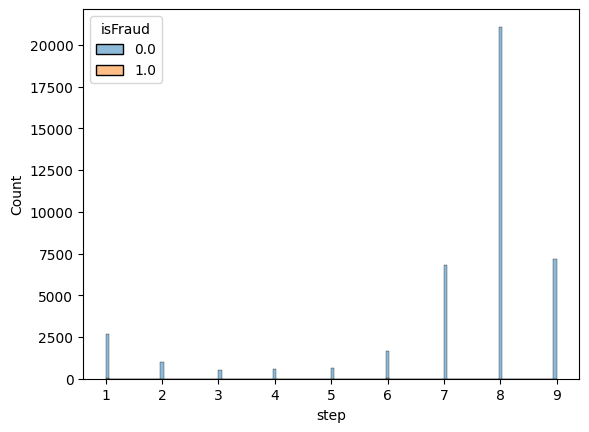

In [68]:
sns.histplot(x='step', data=df,hue='isFraud');

It is difficult to identify fraud transcation time duration,<br>
but we noticed that most of the transactions are below 400 time unit<br>
where 1 time unit = 1 hr

<Axes: xlabel='amount'>

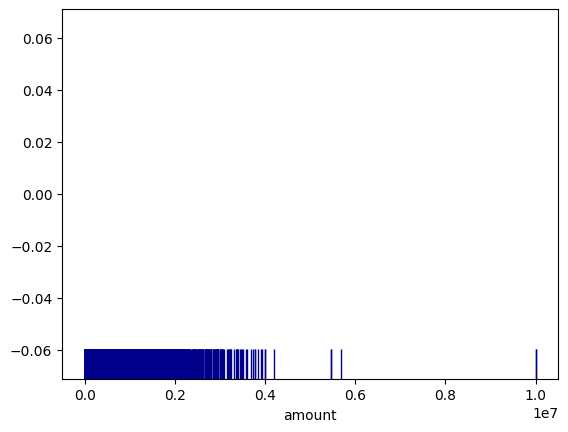

In [69]:
sns.rugplot(x='amount', data=df, height=.08, color='darkblue')

Most of the transaction amounts are small amount and <br>
very few transactions are having large amount transfer. <br>
Thus, their is higher probability that these transactions may be done by fraudulent agents.

In [70]:
df['isFraud'].value_counts()

isFraud
0.0000    42176
1.0000       94
Name: count, dtype: int64

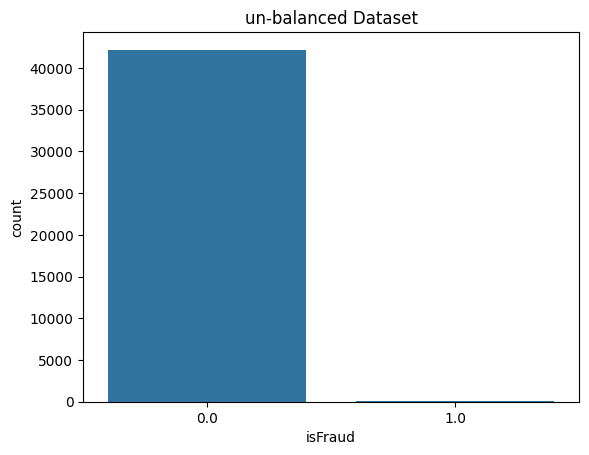

In [71]:
sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

This histograph clearly shows that our dataset is highly Un_Balanced. <br>
Because even in real life , the ratio between fraud transc. and normal trans are one side weighted. <br>
Need to handle this , otherwise it will impact our model Training. <br>

In [72]:
df['type'].value_counts()

type
PAYMENT     19382
CASH_OUT    10689
CASH_IN      7632
TRANSFER     3974
DEBIT         594
Name: count, dtype: int64

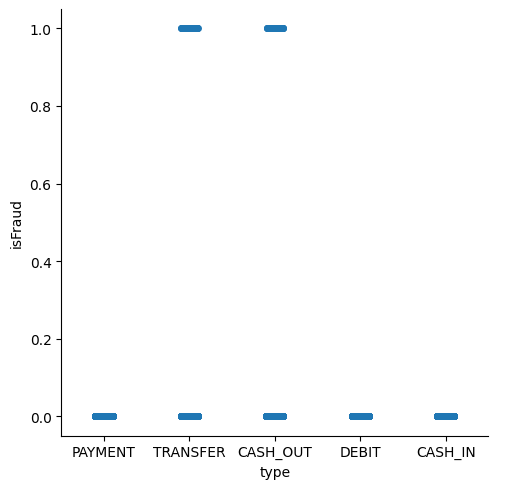

In [73]:
sns.catplot(data=df, x="type", y="isFraud")

Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [74]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1.0000,0.0000
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1.0000,0.0000
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1.0000,0.0000
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1.0000,0.0000
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1.0000,0.0000
1116,1,CASH_OUT,35063.6300,C1635772897,35063.6300,0.0000,C1983025922,31140.0000,7550.0300,1.0000,0.0000
1870,1,CASH_OUT,25071.4600,C1275464847,25071.4600,0.0000,C1364913072,9083.7600,34155.2200,1.0000,0.0000
1911,1,CASH_OUT,132842.6400,C13692003,4499.0800,0.0000,C297927961,0.0000,132842.6400,1.0000,0.0000
2302,1,CASH_OUT,235238.6600,C1499825229,235238.6600,0.0000,C2100440237,0.0000,235238.6600,1.0000,0.0000
3060,2,CASH_OUT,1096187.2400,C77163673,1096187.2400,0.0000,C644345897,0.0000,1096187.2400,1.0000,0.0000


In [75]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1.0000,0.0000
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1.0000,0.0000
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1.0000,0.0000
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1.0000,0.0000
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1.0000,0.0000
1869,1,TRANSFER,25071.4600,C669700766,25071.4600,0.0000,C1384210339,0.0000,0.0000,1.0000,0.0000
2301,1,TRANSFER,235238.6600,C1872047468,235238.6600,0.0000,C116289363,0.0000,0.0000,1.0000,0.0000
3059,2,TRANSFER,1096187.2400,C1093223281,1096187.2400,0.0000,C2063275841,0.0000,0.0000,1.0000,0.0000
3162,2,TRANSFER,963532.1400,C1440057381,963532.1400,0.0000,C268086000,0.0000,0.0000,1.0000,0.0000
3271,2,TRANSFER,14949.8400,C140702728,14949.8400,0.0000,C634210724,0.0000,0.0000,1.0000,0.0000


It is clear that fraudent agents only targeted "CASH_OUT" and "TRANSFER" type of trans.
becuase 100% fraud transactions are lie inside these two types.

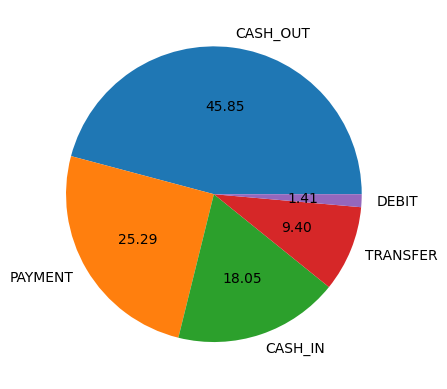

In [76]:
# Calculating individal % of each category of 'type' column in our transactions
#   using pie chart

plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Approx. 69% transactions are of type "CASH_OUT" and "PAYMENT", <br>
    due to which fraudulent agents targeted these two type.

### Outliers Detection

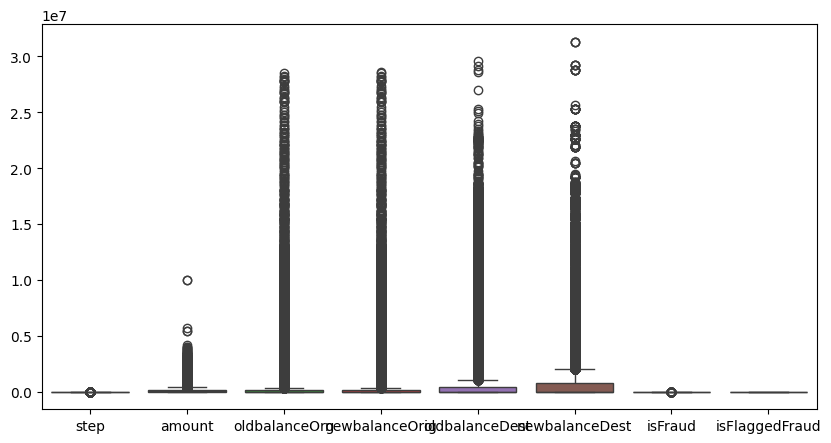

In [77]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [78]:
# using iqr method in "step" feature...

per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

upper limit :-  9.5
upper limit :-  5.5


In [79]:
df[df["step"]>603]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


There are more than 100 thousand records considered as outlier in "step" feature .<br>
we can't remove these records , because of value.<br>

and , <br>
other independent features (numeric ) are denotes amount ( money transaction ), <br>
thus removing these column is not good option.<br>
becuase higher amount may have higher probability to denote fraud transaction.

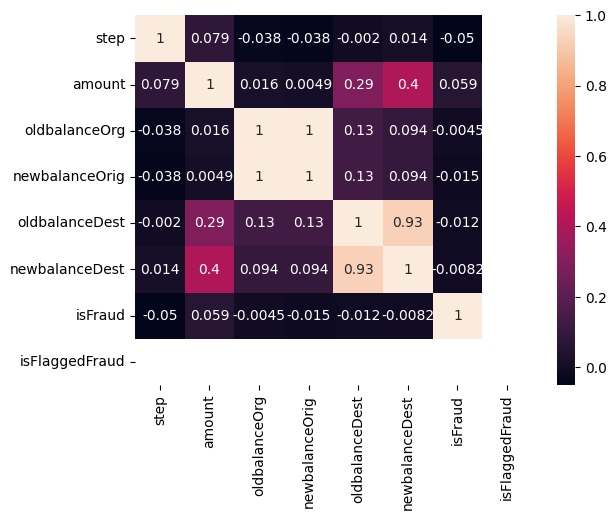

In [80]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

1) Their is multi_collinearity between 4 independent features
<h6> ( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766 <br>
    ( 'oldbalanceOrg', 'newbalanceOrig') = 0.9988  </h6>
Need to remove one from each of two correlation <br>
<br>
2) Best option is to remove 'newbalanceOrig' and 'newbalanceDest', <br>
becuase they are less correlated with dependent feature ( "isFraud"), <br>
as compare to other two one.

# Feature selection

In [83]:
# function which returns un_important features ( only numeric ).

def correlation(dataset,threshold):

    """
    used to store un_important column names
    and set() type stores only unique values
    so, that no duplicated column name will store.
    """
    column_corr=set()

    # storing correlation matrix
    corr_matrix=dataset.corr()

    for i in range (len(corr_matrix.columns)):
        for j in range (i):

            # comparing corr. values with threshold
            if corr_matrix.iloc[i,j]>threshold:

                # if true, then fateching column name
                colname=corr_matrix.columns[i]

                # adding column name to column_corr variable.
                column_corr.add(colname)
    return column_corr


<h4>Checking variations of data in features </h4>

if variation is zero (0) , means that column ( feature ) is not <br>
having any correlation with dependent features.
and we need to remove that column.

In [85]:
from sklearn.feature_selection import VarianceThreshold

In [86]:
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

True :- having variations <br>
False :- not having variations

In [87]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

'isFlaggedFraud' feature having Low_variation in data , <br>
but we can't remove that column, because it  contain these two values (0,1) <br>
which helps to identify whether our transc. is fraud or not <br>
and ,<br>
<br>
it also shows good correlationship with dependent feature ( target feature ) <br>
Thus removing this feature is not good option.

<h4> Checking whether categorical features are useful or not </h4>

In [166]:
df.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

we have 3 categorical features "type" , "nameOrig" , "nameDest"

In [169]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["type"].unique())
print("\n\n nameDest having these unique values :- \n",df["type"].unique())

 type having these unique values :- 
 [4 2 5 1 3]


 nameOrig having these unique values :- 
 [4 2 5 1 3]


 nameDest having these unique values :- 
 [4 2 5 1 3]


we have 4 unique values in "type" feature,<br>

and "nameOrig" and "nameDest" contain more unique values <br>
Lets check their count...

In [89]:
df['nameOrig'].value_counts()

nameOrig
C1231006815    1
C419337443     1
C1061681008    1
C894060432     1
C799834431     1
              ..
C1061133744    1
C619429631     1
C214473697     1
C1339643349    1
C2034845877    1
Name: count, Length: 42271, dtype: int64

In [90]:
df['nameDest'].value_counts()

nameDest
C985934102     73
C1286084959    66
C1590550415    63
C2083562754    62
C977993101     61
               ..
C1754599205     1
C2078522098     1
M1426815634     1
M216894663      1
C71127          1
Name: count, Length: 24626, dtype: int64

most of the data inside "nameOrig" and "nameDest" <br>
are unique ( approx 90% and 60% ), means it will be not useful for model training .<br>
Thus, good option is to remove them.<br>
and even their are just Account names.

In [91]:
df=df.drop({'nameOrig','nameDest'},axis=1)

In [92]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0.0000,0.0000
1,1,PAYMENT,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0.0000,0.0000
2,1,TRANSFER,181.0000,181.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,1,CASH_OUT,181.0000,181.0000,0.0000,21182.0000,0.0000,1.0000,0.0000
4,1,PAYMENT,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0.0000,0.0000


# Feature Encoding

There is only one categorical column ( feature ) which is "type"

In [93]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [94]:
df["type"].value_counts()

type
PAYMENT     19382
CASH_OUT    10689
CASH_IN      7632
TRANSFER     3974
DEBIT         594
Name: count, dtype: int64

We will replace large count class with bigger numeric number, <br>
so, it will helps model for batter understanding of data pattern while training

In [95]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [96]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0.0000,0.0000
1,1,4,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0.0000,0.0000
2,1,2,181.0000,181.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,1,5,181.0000,181.0000,0.0000,21182.0000,0.0000,1.0000,0.0000
4,1,4,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0.0000,0.0000


In [97]:
df["type"].unique()

array([4, 2, 5, 1, 3])

In [98]:
df["type"].value_counts()

type
4    19382
5    10689
3     7632
2     3974
1      594
Name: count, dtype: int64

# Handling Un-Balanced Data

In [99]:
df["isFraud"].value_counts()

isFraud
0.0000    42176
1.0000       94
Name: count, dtype: int64

In [100]:
"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [101]:
normal_transaction.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0.0000,0.0000
1,1,4,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0.0000,0.0000
4,1,4,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0.0000,0.0000
5,1,4,7817.7100,53860.0000,46042.2900,0.0000,0.0000,0.0000,0.0000
6,1,4,7107.7700,183195.0000,176087.2300,0.0000,0.0000,0.0000,0.0000


In [102]:
fraud_transaction.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0000,181.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,1,5,181.0000,181.0000,0.0000,21182.0000,0.0000,1.0000,0.0000
251,1,2,2806.0000,2806.0000,0.0000,0.0000,0.0000,1.0000,0.0000
252,1,5,2806.0000,2806.0000,0.0000,26202.0000,0.0000,1.0000,0.0000
680,1,2,20128.0000,20128.0000,0.0000,0.0000,0.0000,1.0000,0.0000


In [103]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(42176, 9)
(94, 9)


In [104]:
# taking random 8213 records from normal_transaction

normal_transaction=normal_transaction.sample(n=8213)

In [105]:
"""
Now, we have 50-50% fraud and normal transaction data.
next step is to concatenating them
"""
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 9)
(94, 9)


In [106]:
normal_transaction['amount'].describe()

count      8213.0000
mean     150953.7146
std      313919.0294
min           6.4200
25%        6770.9300
50%       26516.5600
75%      179369.9800
max     5677662.2900
Name: amount, dtype: float64

mean of normal transaction is less as compare to fraud trans.

In [107]:
fraud_transaction['amount'].describe()

count         94.0000
mean      541377.0728
std      1670973.1445
min          164.0000
25%        14017.7925
50%        29707.8600
75%       207748.5275
max     10000000.0000
Name: amount, dtype: float64

mean of fraud transaction is higher then normal trans.

In [109]:
# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [111]:
new_df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
34169,8,5,43092.0000,43092.0000,0.0000,660641.7400,1158662.9000,1.0000,0.0000
36026,9,2,556218.0100,556218.0100,0.0000,0.0000,0.0000,1.0000,0.0000
36027,9,5,556218.0100,556218.0100,0.0000,0.0000,582265.8100,1.0000,0.0000
36691,9,2,11308.0000,11308.0000,0.0000,0.0000,0.0000,1.0000,0.0000
36692,9,5,11308.0000,11308.0000,0.0000,0.0000,302550.5600,1.0000,0.0000


NOTICED:-
"Fraud_transcation" dataset added at the end of "normal_transcation" dataset

In [110]:
new_df.shape

(8307, 9)

# Train-Test Split

In [112]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [113]:
X.shape

(8307, 8)

In [114]:
y.shape

(8307,)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# stratify will evenly distribute the data values

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [117]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (6645, 8)
x-test :-   (1662, 8)
y-train :-  (6645,)
y-test :-   (1662,)


In [118]:
y_test.value_counts()

isFraud
0.0000    1643
1.0000      19
Name: count, dtype: int64

In [119]:
y_train.value_counts()

isFraud
0.0000    6570
1.0000      75
Name: count, dtype: int64

Our "isFraud" values are evenly distributed amoungs training and testing data.

# Feature Scaling

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler=StandardScaler()

In [123]:
scaler.fit(x_train)

StandardScaler()

In [124]:
x_train_scaler=scaler.transform(x_train)

In [126]:
x_test_scaler=scaler.transform(x_test)

In [127]:
x_train_scaler

array([[ 0.40363684,  0.18225378, -0.44763373, ..., -0.34314956,
        -0.39449566,  0.        ],
       [-0.06169397,  1.21913424, -0.18445737, ..., -0.34314956,
        -0.34088245,  0.        ],
       [-0.06169397, -0.85462668,  0.38993452, ..., -0.16976068,
         1.08385232,  0.        ],
       ...,
       [ 0.40363684,  0.18225378, -0.4279306 , ..., -0.34314956,
        -0.39449566,  0.        ],
       [ 0.86896765,  0.18225378, -0.43682907, ..., -0.34314956,
        -0.39449566,  0.        ],
       [-0.06169397,  1.21913424, -0.11367598, ..., -0.16886089,
        -0.32691867,  0.        ]])

In [128]:
x_test_scaler

array([[ 0.40363684,  0.18225378, -0.44336411, ..., -0.34314956,
        -0.39449566,  0.        ],
       [ 0.40363684,  1.21913424,  0.02848595, ..., -0.34207142,
        -0.39447077,  0.        ],
       [ 0.40363684,  0.18225378, -0.43465377, ..., -0.34314956,
        -0.39449566,  0.        ],
       ...,
       [-2.85367885, -1.89150714, -0.15887855, ...,  0.01915979,
         0.1480048 ,  0.        ],
       [-0.52702479,  0.18225378, -0.40112653, ..., -0.34314956,
        -0.39449566,  0.        ],
       [-2.85367885,  0.18225378, -0.45021142, ..., -0.34314956,
        -0.39449566,  0.        ]])

# Training and Evaluating model

### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
log_model=LogisticRegression()

In [131]:
log_model.fit(x_train_scaler,y_train)

LogisticRegression()

In [132]:
y_pred=log_model.predict(x_test_scaler)

In [133]:
# for accuracy check :-

from sklearn.metrics import accuracy_score

In [134]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
99.09747292418773
- - - - - - - - - - -


### Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rand_model=RandomForestClassifier()

In [137]:
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [138]:
y_pred=rand_model.predict(x_test_scaler)

In [139]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
99.51865222623346
- - - - - - - - - - -


### Support Vector Machine ( SVM )

In [140]:
from sklearn.svm import SVC

In [141]:
svm_model=SVC()

In [142]:
svm_model.fit(x_train_scaler,y_train)

SVC()

In [143]:
y_pred=svm_model.predict(x_test_scaler)

In [144]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
98.85679903730446
- - - - - - - - - - -


### BernoulliNB

In [145]:
from sklearn.naive_bayes import BernoulliNB

In [146]:
bnb_model=BernoulliNB()

In [147]:
bnb_model.fit(x_train_scaler,y_train)

BernoulliNB()

In [148]:
y_pred=bnb_model.predict(x_test_scaler)

In [149]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
98.85679903730446
- - - - - - - - - - -


### GaussianNB

In [150]:
from sklearn.naive_bayes import GaussianNB

In [151]:
gnb_model=GaussianNB()

In [152]:
gnb_model.fit(x_train_scaler,y_train)

GaussianNB()

In [153]:
y_pred=gnb_model.predict(x_test_scaler)

In [154]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
54.21179302045728
- - - - - - - - - - -


<h3> Conclusion </h3>

Random Forest Classifier  Selected

# Preparing Model for deployment

In [155]:
import pickle

In [156]:
pickle.dump(rand_model,open('model.sav','wb'))

In [157]:
#### Saving the StandadrdScaler object 'scaler'

pickle.dump(scaler,open('scaler.sav','wb'))

<h3>Let's check whether our model working fine or not ?</h3>


In [158]:
rand_model=pickle.load(open('model.sav','rb'))

In [159]:
# loading the scaler file for scaling input array
new_scaler=pickle.load(open('scaler.sav','rb'))

In [160]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4068,3,4,4530.3400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
118,1,5,335416.5100,144478.0000,0.0000,295.0000,52415.1500,0.0000,0.0000
19145,8,2,1141183.6200,9107.0000,0.0000,37749.3600,2325850.9900,0.0000,0.0000
4170,3,2,87674.2600,0.0000,0.0000,157982.1200,124042.9100,0.0000,0.0000
489,1,3,206097.6500,7320347.2800,7526444.9300,1239101.5000,1254956.0700,0.0000,0.0000


In [161]:
# creating ndarray to pass this array as an input data
input_array=np.array([[228,5,117563.1100,0.0000,208908.4100,0]])
input_array

array([[2.2800000e+02, 5.0000000e+00, 1.1756311e+05, 0.0000000e+00,
        2.0890841e+05, 0.0000000e+00]])

In [191]:
# scaling the input_array datapoints
!pip install scikitlearn
from sklearn.preprocessing import StandardScaler
input_array=np.array([[228,5,117563,1100,0.0000,208908,4100,0]])
scalar = StandardScaler
scaler.fit(input_array)
input_array_scale=np.array([[228,5,117563,1100,0.0000,208908,4100,0]])
input_array_scale=scaler.transform(input_array)
input_array_scale=scaler.transform(input_array)

ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)
ERROR: No matching distribution found for scikitlearn


In [192]:
pred = rand_model.predict(input_array_scale)
print(pred)

[0.]


Prediction is correct :)

<h3>Final Conclusion</h3>

1) There is no missing or duplicate values in this dataset
2) Having outliers, but it is not good idea to remove them,<br>
becuase higher values of amount and account balance having <br>
higher porbability to denote fraud transactions.<br>
3) some columns having multi_collinearity, thus<br>
removed one of them.<br>
4) "amount" , "isFlaggedFraud" are key features,
they impact the Fraud prediction.<br>
means , we need to focused on large transcation,<br>
and condition where "amount"=="oldbalanceOrig"<br>
5) Best option is to deploy this model on Cloud server,<br>
and automate this ml model using cloud services.

# Questions:

### 1. Data Cleaning:
- **Missing Values:** No missing data found.
- **Outliers:** Identified outliers in time data, but not removed.
- **Multi-Collinearity:** Fixed by removing correlated features.

### 2. Fraud Detection Model:
- Chose Random Forest Classifier for its accuracy in detecting fraud.

### 3. Variable Selection:
- Removed correlated features and those with low variations.

### 4. Model Performance:
- Random Forest had the highest accuracy among tested models.

### 5. Key Factors Predicting Fraud:
- High transaction amounts and flagged transactions indicate fraud.

### 6. Reasoning for Key Factors:
- Large transactions and flagged ones are likely fraudulent.

### 7. Prevention Strategies:
- Monitor high-value transactions and update security measures.

### 8. Evaluating Prevention Measures:
- Track changes in fraud patterns and update the model.

### Additional Note:
- The model is saved for deployment. [GitHub Link](https://github.com/hardikjp7/Fraudulent-Transactions-Prediction)